# Clean and Analyze Employee Exit Surveys

## Goal:

## Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 

## What about employees who have been there longer?

## Are younger employees resigning due to some kind of dissatisfaction? 

## What about older employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Printing first few rows of the dataset

In [2]:
http://localhost:8888/notebooks/DataQuest/Clean%20and%20Analyze%20Employee%20Exit%20Surveys.ipynb#Printing-first-few-rows-of-the-datasetdirectory = 'C:/Personal Projects/Dataquest/Python Project/Clean and Analyze Employee Exit Surveys/'
ds = pd.read_csv(directory + 'dete_survey.csv')
ts = pd.read_csv(directory + 'tafe_survey.csv')

In [3]:
ds.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
ts.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Data Exploration

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

- There is a lot of null values in both of those datasets

## Data Cleaning and Transformation
## Identify Missing Values and Drop Unnecessary Columns

In [7]:
ds = pd.read_csv(directory + 'dete_survey.csv', na_values = 'Not Stated')
ds.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
ds_updated = ds.drop(ds.columns[28:49], axis = 1)
ts_updated = ts.drop(ts.columns[17:66], axis = 1)

In [9]:
ds_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
ts_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Cleaning column names

In [11]:
ds_updated.columns = ds_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [12]:
ts_updated.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 
                  'Reason for ceasing employment': 'separationtype', 
                  'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
                  'Employment Type. Employment Type': 'employment_status', 
                  'Classification. Classification': 'position', 
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, 
                  axis = 1, inplace = True)

## Filtering the Data

In [13]:
ds_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
ts_updated.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
ds_copy = ds_updated.copy()
ts_copy = ts_updated.copy()

In [16]:
dsr = ds_copy[ds_copy.separationtype.str.startswith('Resignation')]

In [17]:
tsr = ts_copy[ts_copy.separationtype == 'Resignation']

## Verifying and Cleaning the Data

In [18]:
dsr.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [19]:
year_pattern = r"([1-2][0-9]{3})"

dsr = dsr.copy()
dsr.cease_date = dsr.cease_date.str.extract(year_pattern)
dsr.cease_date.value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [20]:
dsr.cease_date = dsr.cease_date.astype('float')

In [21]:
dsr.dete_start_date.value_counts()

2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

In [22]:
tsr.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

## Creating a New Column

In [23]:
dsr['institute_service'] = dsr.cease_date - dsr.dete_start_date

In [24]:
dsr.institute_service.value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

## Identify Dissatisfied Employees

In [25]:
tsr['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tsr['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [28]:
tsu = tsr.copy()

In [29]:
tsr['dissatisfied'] = tsu[['Contributing Factors. Dissatisfaction',
                           'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\1567479161.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
C:\Users\andya\AppData\Local\Temp\ipykernel_25636\1567479161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsr['dissatisfied'] = tsu[['Contributing Factors. Dissatisfaction',


In [30]:
tsr['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [31]:
dete_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'work_life_balance', 'workload']

In [32]:
dsu = dsr.copy()

In [33]:
dsr['dissatisfied'] = dsu[dete_cols].any(1, skipna=False)

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\1460733790.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  dsr['dissatisfied'] = dsu[dete_cols].any(1, skipna=False)


In [34]:
dsr['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

In [35]:
dsr['institute'] = 'DETE'

In [36]:
dsr

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0,False,DETE
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0,False,DETE
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True,DETE


In [37]:
tsr['institute'] = 'TAFE'

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\2376389438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsr['institute'] = 'TAFE'


In [38]:
tsr

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6,False,TAFE
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,False,TAFE
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,False,TAFE


In [39]:
combined = pd.concat([dsr, tsr], ignore_index = True)
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,-,-,-,-,-,Other,-,1-2


In [40]:
combined_updated = combined.dropna(axis = 'columns', thresh=500)

In [41]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


## Cleaning the Service Column

In [42]:
combined_updated.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [43]:
combined_updated.institute_service = combined_updated.institute_service.astype('str')

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\2939046785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.institute_service = combined_updated.institute_service.astype('str')


In [44]:
combined_updated.institute_service.dtypes

dtype('O')

In [45]:
combined_updated.institute_service

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object

In [46]:
combined_updated.institute_service.value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [47]:
combined_updated.institute_service = combined_updated.institute_service.str.replace('Less than 1 year', '1.0')
combined_updated.institute_service = combined_updated.institute_service.str.replace('More than 20 years', '20.0')
combined_updated.institute_service = combined_updated.institute_service.str.replace('1-2', '2.0')
combined_updated.institute_service = combined_updated.institute_service.str.replace('3-4', '4.0')
combined_updated.institute_service = combined_updated.institute_service.str.replace('5-6', '6.0')
combined_updated.institute_service = combined_updated.institute_service.str.replace('7-10', '10.0')
combined_updated.institute_service = combined_updated.institute_service.str.replace('11-20', '20.0')
combined_updated.institute_service.value_counts()

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\4226499972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.institute_service = combined_updated.institute_service.str.replace('Less than 1 year', '1.0')
C:\Users\andya\AppData\Local\Temp\ipykernel_25636\4226499972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.institute_service = combined_updated.institute_service.str.replace('More than 20 years', '20.0')
C:\Users\andya\AppData\Local\Temp\ipykernel_25636\4226499972.

1.0      95
nan      88
4.0      79
2.0      78
6.0      50
10.0     27
12.00    26
5.0      23
3.0      20
0.0      20
20.0     17
9.0      14
7.0      13
8.0       8
13.0      8
15.0      7
22.0      6
14.0      6
17.0      6
12.0      6
18.0      5
16.0      5
11.0      4
23.0      4
24.0      4
39.0      3
19.0      3
32.0      3
21.0      3
25.0      2
28.0      2
30.0      2
36.0      2
26.0      2
33.0      1
49.0      1
35.0      1
41.0      1
27.0      1
42.0      1
29.0      1
34.0      1
31.0      1
38.0      1
Name: institute_service, dtype: int64

In [48]:
combined_updated.institute_service = combined_updated.institute_service.astype('float')

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\3699361565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.institute_service = combined_updated.institute_service.astype('float')


In [49]:
combined_updated.institute_service.dtypes

dtype('float64')

In [50]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,6.0,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,2.0,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,6.0,False,TAFE


In [51]:
combined_updated.institute_service.value_counts()

1.0     95
4.0     79
2.0     78
6.0     50
12.0    32
10.0    27
5.0     23
3.0     20
0.0     20
20.0    17
9.0     14
7.0     13
8.0      8
13.0     8
15.0     7
17.0     6
22.0     6
14.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
21.0     3
39.0     3
19.0     3
32.0     3
30.0     2
26.0     2
36.0     2
28.0     2
25.0     2
27.0     1
34.0     1
29.0     1
42.0     1
49.0     1
41.0     1
38.0     1
33.0     1
35.0     1
31.0     1
Name: institute_service, dtype: int64

In [52]:
def svc_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val > 6 and val <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated.institute_service.apply(svc_cat)
combined_updated.service_cat

C:\Users\andya\AppData\Local\Temp\ipykernel_25636\3362713788.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated.institute_service.apply(svc_cat)


0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

In [53]:
combined_updated.service_cat.value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Performing Initial Analysis

In [62]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,6.0,False,TAFE,Experienced
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,2.0,False,TAFE,New
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,6.0,False,TAFE,Experienced


In [54]:
combined_updated.dissatisfied.value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [64]:
dis_table = combined_updated.pivot_table(index = 'service_cat', values='dissatisfied').sort_values(by='dissatisfied', ascending=True)
dis_table

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Veteran,0.485294
Established,0.516129


C:\Users\andya\AppData\Local\Temp\ipykernel_25636\2117194763.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])


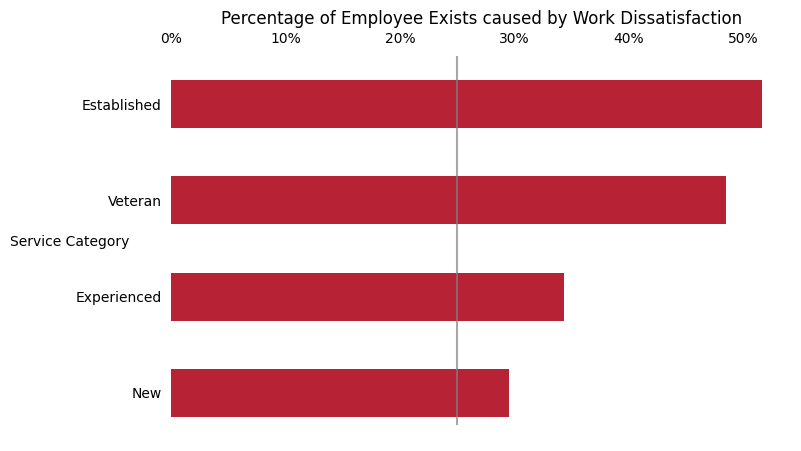

In [115]:
chart = dis_table.plot(kind='barh', alpha=0.9, color = '#af0b1e', figsize=(8,5), legend=False)
chart.title.set_text('Percentage of Employee Exists caused by Work Dissatisfaction')
chart.set_ylabel('Service Category', rotation=0)
for location in ['left','right','top','bottom']:
    chart.spines[location].set_visible(False)
chart.xaxis.tick_top()    
chart.tick_params(top=False, left=False)
chart.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])
chart.axvline(x=.25, ymin=0.045, c='grey', alpha=0.7)